# Urban Simulation Assessment
Student ID:
# Part 1: London's underground resilience



In [224]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from operator import itemgetter
import numpy as np
from statistics import mean

In [225]:
# constructing network 
G= nx.read_graphml('london.graph.xml')
G.name='London Tube Network'

In [226]:
nx.info(G)

/var/folders/6q/lt72x0f15mlc30pw4swdcj0r0000gn/T/ipykernel_10900/1064119803.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(G)


"Graph named 'London Tube Network' with 401 nodes and 467 edges"

In [227]:
list(G.nodes(data = True))[0]

('Wembley Park', {'coords': '(519316.5590174915, 186389.32981656672)'})

In [228]:
#since coords tuples are stored as string, need to convert them back to tuples using eval()
for node in G.nodes():
    G.nodes[node]['coords'] = eval(G.nodes[node]["coords"])
list(G.nodes(data = True))[0]

('Wembley Park', {'coords': (519316.5590174915, 186389.32981656672)})

In [229]:
list(G.edges(data = True))[0]

('Wembley Park',
 'Kingsbury',
 {'length': 2916.7715580506483, 'line_name': 'Jubilee', 'flows': 12356})

In [230]:
# the edge connecting the stations farther away from each other
max(dict(G.edges).items(), key=lambda x: x[1]['length'])

(('Wembley Park', 'Finchley Road'),
 {'length': 7266.37392749648, 'line_name': 'Metropolitan', 'flows': 55216})

In [231]:
max(dict(G.edges).items(), key = lambda x: x[1]["length"])

(('Wembley Park', 'Finchley Road'),
 {'length': 7266.37392749648, 'line_name': 'Metropolitan', 'flows': 55216})

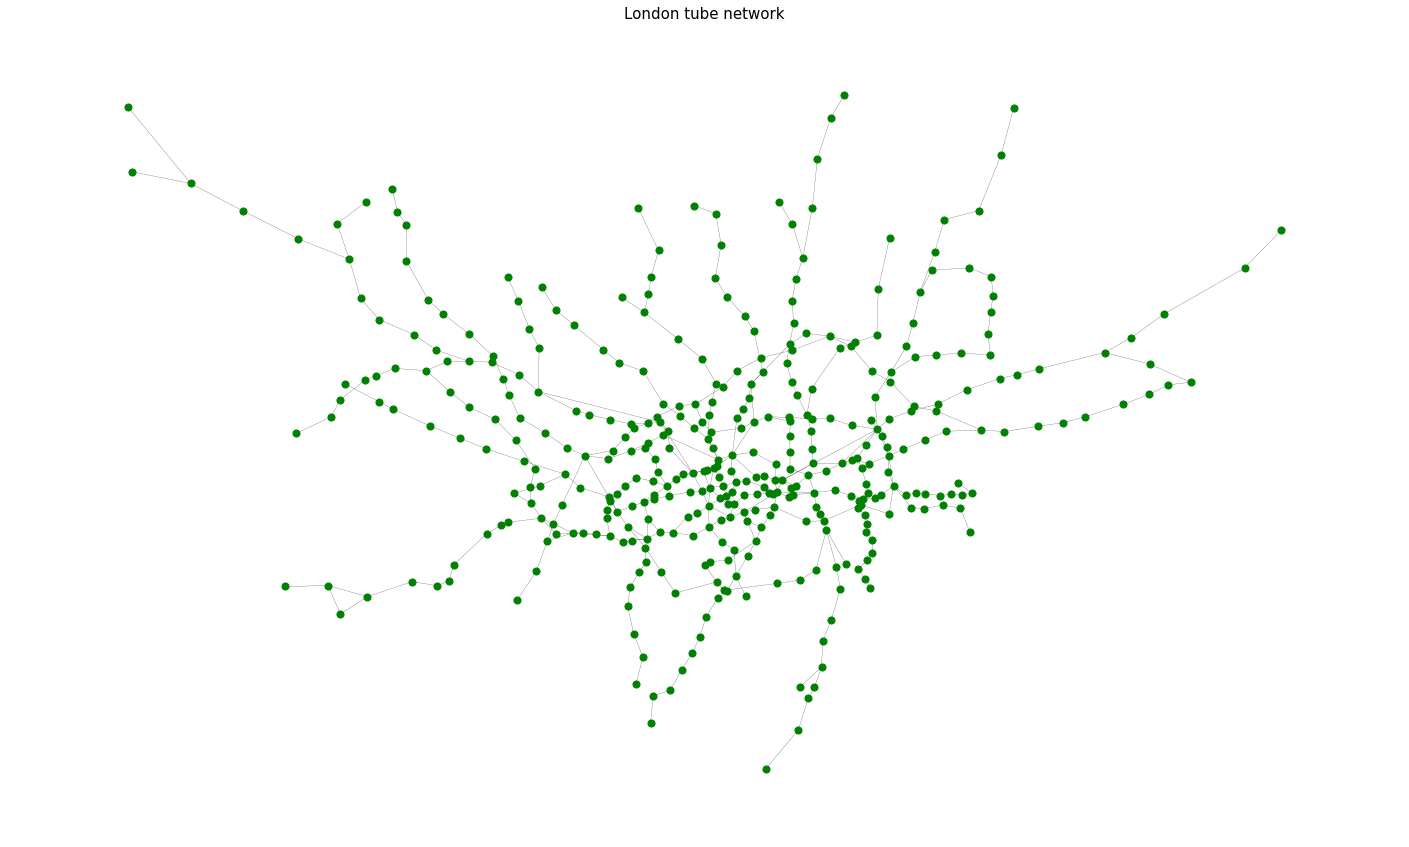

In [232]:
#plot the network
fig,ax=plt.subplots(figsize=(25,15))
# node_labels=nx.get_node_attributes(G,G.nodes() )
pos=nx.get_node_attributes(G,'coords')

nx.draw_networkx_nodes(G,pos,node_size=50,node_color='g')
nx.draw_networkx_edges(G,pos,arrows=False,width=0.2)
# nx.draw_networksx_labels(G,pos,node_labels,font_size=10,font_color=black)


plt.title("London tube network",fontsize=15)
plt.axis("off")
plt.show()

In [233]:
nx.diameter(G)

36

In [234]:
nx.number_connected_components(G)

1

# I.Topological network
## I.1. Centrolity measures:

**Display three centrality metric: degree, closeness and betweenness**

#### 1.1 Degree Centrality
**Definition** : $c_i = \frac{d_i}{n-1}$ where n is the number of nodes in G.
$c_i, d_i$ is the degree centrality and degree of node $i$ respectivly.

**Explanation**: The higher the $c_i$, the more nodes are connected to the node. In this dataset, Stratford has the highest $c$, equal to 0.025. This means that there are 0.0225 * 400 = 9 stations directly connected to Startford.
And we can see in fig 1  that nodes with high degree have star edges, while nodes with low degree are usually located on a unique path.
#### 1.2 Closeness Centrality
**Definition** :$$ C_i = \frac{n - 1}{\sum_j^{n-1}d(i,j)}$$ Closeness centrality of a node $i$ is the reciprocal of the average shortest path distance to u over all $n-1$ reachable nodes. Where $d(i, j)$ is the shortest-path distance between $i$ and $j$, and n-1 is the number of nodes reachable from $i$.

**Explanation**: In London underground data, high closeness centrality means that the average distance from that node to other nodes is the shortest.
In Figure 2, we can see nodes with high closeness centrality clustered in the city center, which means that the average distance from the city center to everywhere is the shortest, which is intuitive.
#### 1.3 weighted Betweenness Centrality

**Definition**: Betweenness centrality of a node  is the sum of the fraction of all-pairs shortest paths that pass through 
$$C_i = \sum_{s,t \in V}\frac{\sigma(s,t|i)}{\sigma(s,t)}$$
where $V$ is the set of nodes, $\sigma(s,t)$ is the number of shortest $(s,t)$-paths, and $\sigma(s,t|i)$ is the number of those paths passing through some node $i$ other than $s,t$ . If $s = t$ ,$\sigma(s,t) = 1$ , and if $i \in \{s,t\}$,$\sigma(s,t|i) = 0$.

**Explanation**: ExplainBetweenness Centrality measures how many pairs of nodes in the graph have the shortest path (geodesic) through that node. High Betweenness Centrality nodes act as a bridge for more site communication. As can be seen from Figure 3, nodes with high Betweenness Centrality are usually located at the intersection of multiple lines, acting as a transit.

In [235]:
def cal_central(G):
    central_deg = nx.degree_centrality(G)
    central_clos  = nx.closeness_centrality(G)
    central_bet = nx.betweenness_centrality(G, normalized = True)
    central_dict = {"Degree Centrality": central_deg, "Closeness Centrality":central_clos, "Betweenness Centrality":central_bet}
    central_name = ["Degree Centrality", "Closeness Centrality", "Betweenness Centrality"]
    for name in central_name:
        nx.set_node_attributes(G, central_dict[name], name)
    df = pd.DataFrame(index = G.nodes())
    for name in central_name:
        df[name] = pd.Series(nx.get_node_attributes(G, name))
    df = df.reset_index().rename(columns={"index":"Top 10 stations"})
    res_pd = pd.DataFrame()
    for name in central_name:
        df_sorted = df.sort_values(name, ascending=False)
        df_tmp = df_sorted[0:10].loc[:,["Top 10 stations", name]].reset_index(drop = "True")
        res_pd = pd.concat([res_pd, df_tmp], axis = 1, ignore_index = True)
    res_pd.columns=["Stations of Degree", central_name[0],"Stations of Closeness", central_name[1],"Stations of Betweenness", central_name[2]]
    return(res_pd)
res_pd = cal_central(G)
res_pd

,Stations of Degree,Degree Centrality,Stations of Closeness,Closeness Centrality,Stations of Betweenness,Betweenness Centrality
0,Stratford,0.0225,Green Park,0.114778,Stratford,0.297846
1,Bank and Monument,0.0200,Bank and Monument,0.113572,Bank and Monument,0.290489
2,King's Cross St. Pancras,0.0175,King's Cross St. Pancras,0.113443,Liverpool Street,0.270807
3,Baker Street,0.0175,Westminster,0.112549,King's Cross St. Pancras,0.255307
4,Earl's Court,0.0150,Waterloo,0.112265,Waterloo,0.243921
5,Oxford Circus,0.0150,Oxford Circus,0.111204,Green Park,0.215835
6,Liverpool Street,0.0150,Bond Street,0.110988,Euston,0.208324
7,Waterloo,0.0150,Farringdon,0.110742,Westminster,0.203335
8,Green Park,0.0150,Angel,0.110742,Baker Street,0.191568
9,Canning Town,0.0150,Moorgate,0.110314,Finchley Road,0.165085


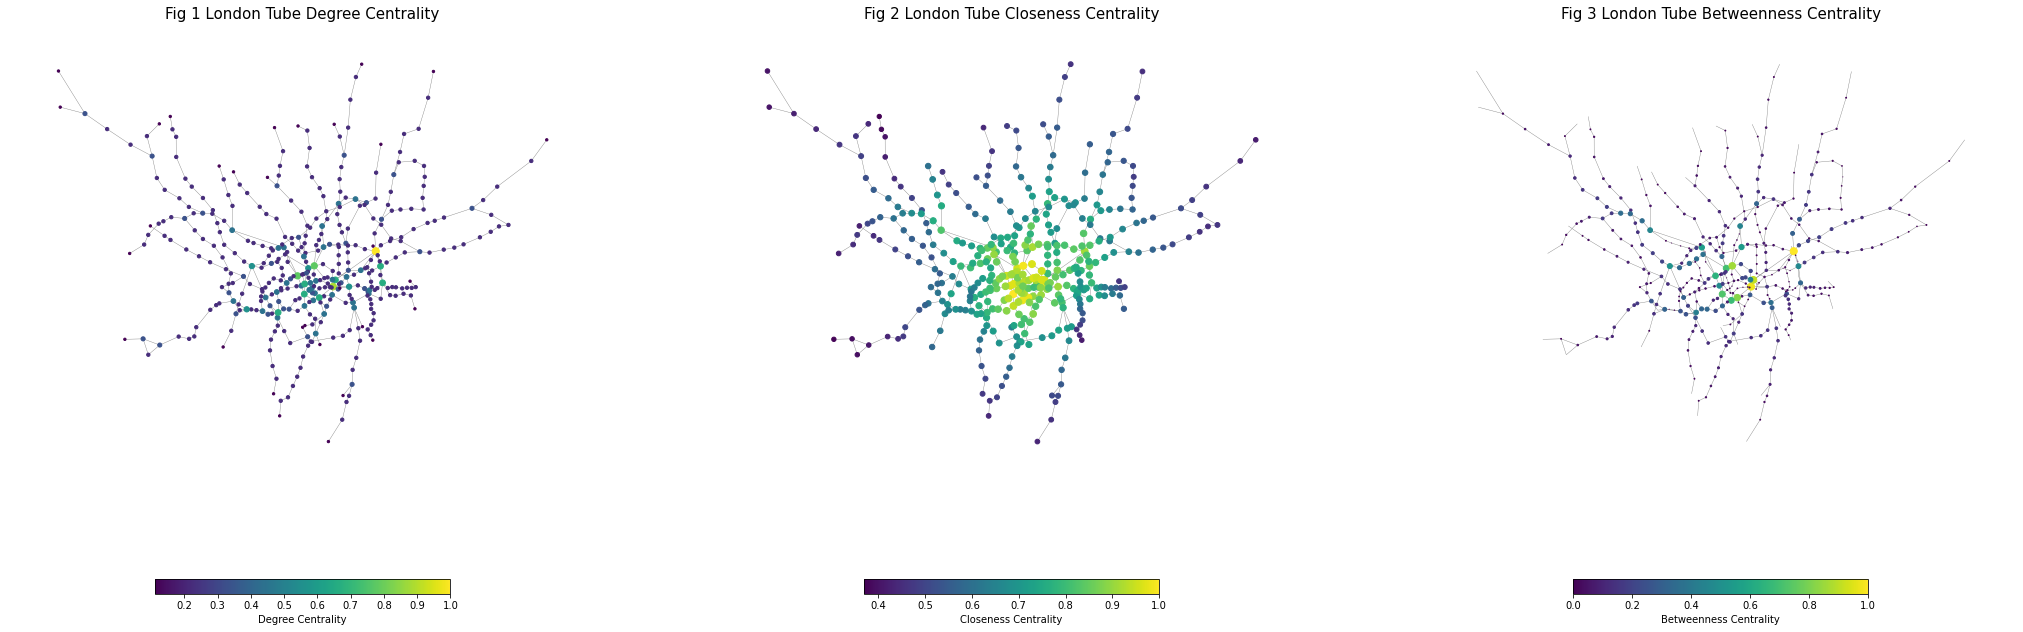

In [236]:
central_name = ["Degree Centrality", "Closeness Centrality", "Betweenness Centrality"]
pos=pos
fig, ax = plt.subplots(1, 3, figsize=(36,12))
for i in range(3):
        name = central_name[i]
        degree_values=[(i[1][name]) for i in G.nodes(data=True)]
        deg_color=[(i[1][name]/(max(degree_values))) for i in G.nodes(data=True)]
        deg_size=[(i[1][name]/(max(degree_values)))*50 for i in G.nodes(data=True)]
        if name == "Closeness Centrality ":
            degree_values=[(i[1][name]) for i in G.nodes(data=True)]
            deg_color=[(i[1][name] - min(degree_values)) / (max(degree_values) - min(degree_values)) for i in G.nodes(data=True)]
            deg_size=[((i[1][name] - min(degree_values)) / (max(degree_values) - min(degree_values))*50) for i in G.nodes(data=True)]
        plt.sca(ax[i])
        nx.draw_networkx_edges(G, pos, edge_color='gray', 
            width=0.4)
        nod=nx.draw_networkx_nodes(G,
            pos = pos,
            node_color= deg_color,
            node_size= deg_size)
        plt.colorbar(nod, ax=ax[i], label = name, orientation = "horizontal", shrink = 0.5)
        ax[i].set_title("Fig " + str(i + 1) + " London Tube " + name,fontsize=15)
        ax[i].set_axis_off()
plt.show()

## I.2. Impact Measure
#### 2.1 number of components:
Number of components measures how many non-communicative subgraphs are in a graph.
#### 2.2 global efficiency
The efficiency of a pair of nodes in a graph is the multiplicative inverse of the shortest path distance between the nodes. The average global efficiency of a graph is the average efficiency of all pairs of nodes
$$ E = \sum_{i \in V}\sum_{j \in V} \frac{dist(i,j)}{n(n-1)}$$

Obviously, these two measures have meaning for arbitrary graph structures. In multiple areas such as transport networks, protein interactions, and the Internet, both of these metrics have practical implications and are not limited to the analysis of the London Underground network.


## I.3. Node Removal
**Betweenness Centrality is better**

As can be seen from the figure, degree centrality is not sensitive to number of components, and even if 10 cities are excluded, the number of components does not change. Closeness centrality is less sensitive to the number of components. The top 5 cities have no impact on the number of components at all. Betweenness centrality, on the other hand, performed well under both exclusion strategies and both impact measures

**global efficiency is better**

Of the two impact measures, the number of components is not sensitive to site rejection. As can be seen from the last two columns in the figure, when there are fewer stations excluded, the entire underground network has not undergone major structural changes, and the number of components has not changed. When the number of excluded stations accumulates to a certain number, the entire underground network quickly collapses, and the number of components falls like an avalanche. Therefore, the number of components does not reflect the state of the underground network in real time, so it is not suitable.

Global efficiency, on the other hand, is sensitive to rejecting station reflections and is better suited to monitoring the operation of underground networks.

**sequential strategy is better**

As can be seen in the centrality definition in I.1, nodes in the graph interact with each other through edges. If there is a structural change in the graph (excluding node or edge), it will have an impact on centrality. Therefore, the nodes excluded by the sequential strategy of evaluating node centrality in real time are the nodes that are really important. Under the non-sequential strategy, the efficiency of culling nodes is not high. So the sequential strategy is better.

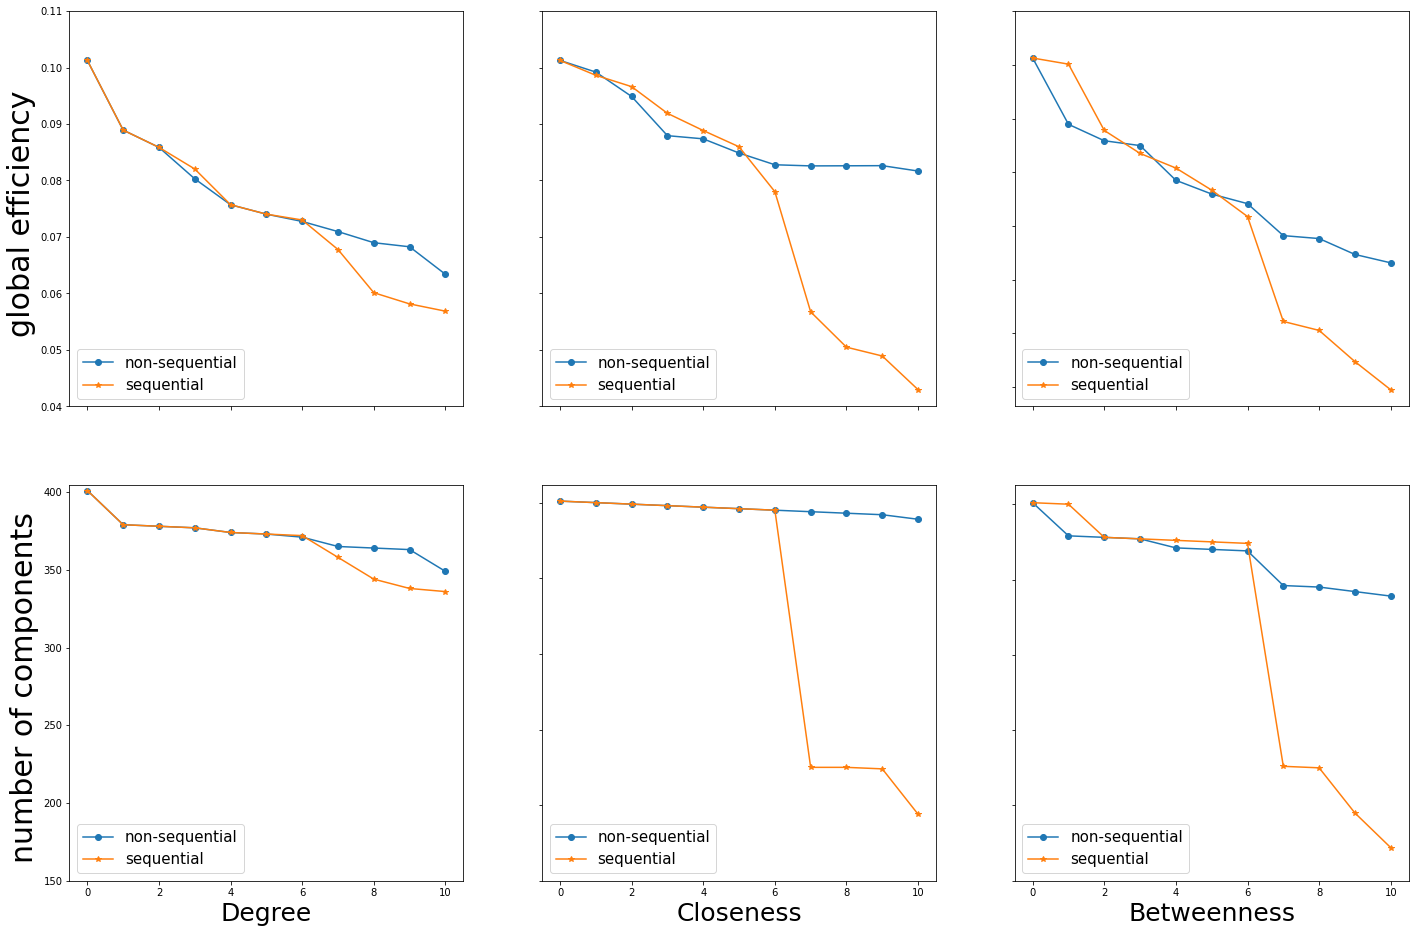

In [237]:
station_cls = ["Stations of Degree", "Stations of Closeness", "Stations of Betweenness"]
nonseq_dict = dict()
for name in station_cls:
    G_tmp = G.copy()
    tmp_global_eff =[nx.global_efficiency(G_tmp)]
    tmp_num_com = [len( max(nx.connected_components(G_tmp), key=len))]
    for i in res_pd[name]:
        G_tmp.remove_node(i)
        tmp_global_eff.append(nx.global_efficiency(G_tmp))
        tmp_num_com.append(len( max(nx.connected_components(G_tmp), key=len)))
    nonseq_dict[name] = [tmp_global_eff, tmp_num_com]
station_cls = ["Stations of Degree", "Stations of Closeness", "Stations of Betweenness"]
seq_dict = dict()
for name in station_cls:
    G_tmp = G.copy()
    tmp_global_eff =[nx.global_efficiency(G_tmp)]
    tmp_num_com = [len( max(nx.connected_components(G_tmp), key=len))]
    for i in range(10):
        G_tmp.remove_node(res_pd[name][0])
        tmp_global_eff.append(nx.global_efficiency(G_tmp))
        tmp_num_com.append(len( max(nx.connected_components(G_tmp), key=len)))
        res_pd = cal_central(G_tmp)
    seq_dict[name] = [tmp_global_eff, tmp_num_com]
strategy_cls = ["non-sequential ", "sequential "]
strategy_dict = {"non-sequential ": nonseq_dict, "sequential ": seq_dict}
measure_cls = ["global efficiency ", "number of components "]
f, axs = plt.subplots(2,3, figsize = (24, 16))
for i in range(2):
    for j in range(3):
        name = station_cls[j]
        measure = measure_cls[i]
        axs[i, j].set_xlabel(name.split()[2], fontsize=25)
        axs[i, j].plot(strategy_dict["non-sequential "][name][i],marker='o', label = "non-sequential")
        axs[i, j].plot(strategy_dict["sequential "][name][i],marker='*', label = "sequential")
        axs[i, j].set_ylabel(measure, fontsize =30)
        if i == 0:
            axs[i, j].set_yticks(np.arange(0.04, 0.11, 0.01))
        if i == 1:
            axs[i, j].set_yticks(np.arange(150,401, 50))
        axs[i, j].label_outer()
        axs[i, j].legend(fontsize = 15, loc = "lower left")
plt.show()

## II. Flows: weighted network
#### II.1. Consider the centrality measure derived in I.- indicating the most relevant stations for assessing the vulnerability of the underground. What would you need to do to adjust this measure for a weighted network? Recompute the ranking of the 10 most important nodes according to this adjusted measure. Do you find the same ones as in I.1?

In [238]:
### Weighted betweenness centrality:

#Let us compute the betweenness centrality for the network, without using weights:
bet_london_w=nx.betweenness_centrality(G, weight='flows', normalized=True)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,bet_london_w,'weighted Betweenness Centrality')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['weighted Betweenness Centrality'] = pd.Series(nx.get_node_attributes(G, 'weighted Betweenness Centrality'))
df_sorted = df.sort_values(["weighted Betweenness Centrality"], ascending=False)

res_pd = cal_central(G)
df_top = df_sorted[:10].reset_index()
df_top.columns=["Stations of weighted Betweenness","weighted Betweenness Centrality"]
pd.concat([res_pd, df_top], axis = 1).iloc[:,4:8]


,Stations of Betweenness,Betweenness Centrality,Stations of weighted Betweenness,weighted Betweenness Centrality
0,Stratford,0.297846,West Hampstead,0.355909
1,Bank and Monument,0.290489,Gospel Oak,0.275025
2,Liverpool Street,0.270807,Finchley Road & Frognal,0.268747
3,King's Cross St. Pancras,0.255307,Hampstead Heath,0.267820
4,Waterloo,0.243921,Willesden Junction,0.240182
5,Green Park,0.215835,Leicester Square,0.214258
6,Euston,0.208324,Brondesbury,0.207093
7,Westminster,0.203335,Brondesbury Park,0.205658
8,Baker Street,0.191568,Kensal Rise,0.204258
9,Finchley Road,0.165085,Blackhorse Road,0.201651


**The Betweenness Centrality weighted by flow is totally different from the Between Centrality**

#### II.2 Now consider the measure for assessing the impact of node removal. Would you adjust the measure for a weighted network? If yes, how? Propose a different measure that would be better at assessing the impact of closing a station taking into consideration the passengers

Yes, the **global efficiency** can be adjusted for a weighted network. The efficiency of a pair of nodes in a graph is the multiplicative inverse of the shortest path distance between the nodes. The average global efficiency of a graph is the average efficiency of all pairs of nodes. We can adjust the geodesics to be weighted geodesic distance.
Except that, we can use **average degree weighted by flow** to measuse the impact of closing a station.

#### II.3. Remove only the highest ranked node according to the best performing centrality measure found in I.1. Evaluate the impact according to the 2 measures in II.2. Repeat the experiment for the highest ranked node using the adjusted measure. If it’s the same node apply it to the second ranked node. Critically discuss which closure will have the largest impact on passengers, referring to your measures and results.

In [239]:
#find the highest ranked node 
# remove the node with the max value of betweenness centrality:

#topology 
betweenness_t_values=[(i[1]['Betweenness Centrality']) for i in G.nodes(data=True)]
maxbet=[n for n in G.nodes() if G.nodes[n]['Betweenness Centrality'] == max(betweenness_t_values)]
maxbet

['Stratford']

In [240]:
#weighted 
betweenness_w_values=[(i[1]['weighted Betweenness Centrality']) for i in G.nodes(data=True)]
maxbew=[n for n in G.nodes() if G.nodes[n]['weighted Betweenness Centrality'] == max(betweenness_w_values)]
maxbew

['West Hampstead']

In [241]:
global_efficiency = {}
average_degree = {}


#initial graph: global efficiency and average degree 
#global efficiency
ge= nx.global_efficiency(G)
#average degree
degree_G=nx.degree(G,weight='flows')
nx.set_node_attributes(G,dict(degree_G),'deg')
G_deg=[(i[1]['deg']) for i in G.nodes(data=True)] # this only keeps the degree values which we will use for the color of nodes
av_deg_G= mean(G_deg) 

#Topology
G5=G.copy()
G5.remove_nodes_from(maxbet)
ge
ge_t = nx.global_efficiency(G5)
#ave_degree
G_deg_t=[(i[1]['deg']) for i in G5.nodes(data=True)] 
av_deg_G_t= mean(G_deg_t)

#weighted
G6=G.copy()
G6.remove_nodes_from(maxbew)
#ge
ge_w = nx.global_efficiency(G6)
#ave_degree
G_deg_w=[(i[1]['deg']) for i in G6.nodes(data=True)] # this only keeps the degree values which we will use for the color of nodes
av_deg_G_w= mean(G_deg_w)

global_efficiency.update({'global_efficiency':ge,'global_efficiency_t':ge_t,'global_efficiency_w':ge_w})
average_degree.update({'av_deg':av_deg_G,'av_deg_t':av_deg_G_t,'av_deg_w':av_deg_G_w})
print(average_degree)
print(global_efficiency)

{'av_deg': 49530.40897755611, 'av_deg_t': 48742.8325, 'av_deg_w': 49521.6125}
{'global_efficiency': 0.1012561935972123, 'global_efficiency_t': 0.08891736066510689, 'global_efficiency_w': 0.10005038744672845}


| | betweenness | weighted betweenness| init_measure|
|-|-|-|-|
|av_deg|48742.83|49521.61|49530.40|
|global_effi|0.0889|0.1001|0.1012|

init_measure is measured before removal

# Part 2 Spatial Interaction Model
## III. Models and calibration
#### III.1. Spatial interaction models: Briefly introduce the spatial interaction models covered in the lectures using equations and defining the terms, taking particular care in explaining the role of the parameters.
**basic gravity model**
The family of spatial interaction models can be regarded as an extension of the most commonly used basic gravity model (Wilson, 1971).
$$T_{ij} = K \frac{P_{i}P_{j}}{d^2_{ij}} $$ 
$T_{ij}$ is the **flow** between site $i$ and $j$, $P_{i}$ is the **mass or population** at site $i$, and $d_{ij}$ is the **deterance (travel cost)** between $i$ and $j$, $K$ is a **scaling constant**.

In this basic gravity model, the source site have the same influence as the target site. It means the$T_{ij}$ equals to $T_{ji}$ which ignored the direction between source point and target point.

**generalized model**
Therefore, we can subsitute $P_i, P_j$ with $O_i, D_j$ which means the out-flow from site $i$ and in-flow to site $j$ repectively. It add direction information to model. Beside that, we can generalize the deterance (travel cost) from $d^2_{ij}$ to any meaningful function $f(d_{ij})$ such as polynomial, exponential fucntion and etc. We can get a genernal function format:
$$ T_{ij} = K \frac{O_i D_j}{f(d_{ij})}$$
If we do the same generalization operation as $d_{ij}$ on $O_j, D_i$, we can get:
$$ T_{ij} = K f_1(O_i)f_2(D_j)f_3(d_{ij})^{-1}$$
When we fit this model using data, our aim is getting the value of $K$ and other parameters.

**Unconstrained model**
take $f_1, f_2$ as identify function and $f_3(d_ij)$ as $exp(\beta d_{ij})$, we have:
$$ T_{ij} = K O_iD_j exp(-\beta d_{ij})$$
Then, we can add constraint equality to this model :
$$ T = \sum_i^n\sum_j^m T_{ij}$$
It can be obtained from the above two formulas:
$$T_{ij} = T \frac{O_iD_j exp(-\beta d_{ij})}{\sum \sum O_iD_j exp(-\beta d_{ij})}$$
 The flow $T_{ij}$ is normlized by the sum of all flows between any two sites.And The sum equals to 1. We also can think of this as defining probabilities of trips between $i$ and $j$.



**The Singly Constrained Models**

If we partition the data according to origin site and introduce different constraint equality on different partitions: $K$ takes different value $A_i$ at different source site $i$. we call that **the Origin-Constrained Model**
$$ T_{ij} = A_i O_i D_j exp(- \beta d_{ij})$$
$$ \sum_j^m T_{ij} = O_i$$

Similarly, if we partition the data according to target site, we can get **the Destination-Constrained Model**
$$ T_{ij} = B_j O_i D_j exp(- \beta d_{ij})$$
$$ \sum_i^n T_{ij} = D_j$$
if we partition the data according to both target and source site,  **the  Doubly-Constrained Model**
$$ T_{ij} = A_iB_j O_i D_j exp(- \beta d_{ij})$$
$$ \sum_j^m T_{ij} = O_i$$
$$ \sum_i^n T_{ij} = D_j$$


#### III.2. Using the information of population, jobs and flows, select a spatial interaction model and calibrate the parameter beta. Make sure to justify your selection of model.

In London flow data, there have 400 sites in this graph. THe Singly Constrained Model will built too much model so that we can't get clear insight. And take $O_i$ as population at site $i$, $D_j$ as jobs at site $j$.So I use the simply unconstraint model:
$$ T_{ij} = K O_iD_j exp(-\beta d_{ij})$$
$$ \sum \sum T_{ij}^{obs} = T $$
It can be obtained from the above two formulas:
$$T_{ij} = T \frac{O_iD_j exp(-\beta d_{ij})}{\sum \sum O_iD_j exp(-\beta d_{ij})}$$
We search $\beta$ in $[1e-6, 5e-5]$:

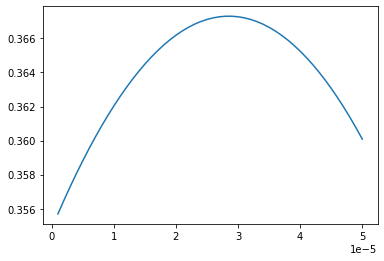

best beta:
2.9000000000000004e-05
Rsquared:
0.3673017901845381


In [242]:
beta_list = np.linspace(1e-6,5e-5, 50)
fit_rsquared = []
for i in beta_list:
    #read data
    cdatasub = pd.read_csv("london_flows.csv")

    # calculate T = sum_ij (T_ij)
    T_all = np.sum(cdatasub["flows"])
    
    # transform dist = exp(-beta  d_ij)
    dist =np.exp(-i * cdatasub["distance"])
    
    # calculate unnormlized  flow
    Tp_unnorm = cdatasub["population"] * cdatasub["jobs"] * dist
    
    # normlize travel flow  Tp_ij
    T_prob = Tp_unnorm / np.sum(Tp_unnorm)
    
    # Tp_ij * T
    flow_pred = T_prob * T_all

    # calculate R^2
    fit_rsquared.append( 1- np.mean(np.power(flow_pred- cdatasub["flows"], 2))/ (np.mean(np.power(cdatasub["flows"] - np.mean(cdatasub['flows']),2))))
plt.plot(beta_list, fit_rsquared)
plt.show()
print("best beta:")
print(beta_list[np.argmax(fit_rsquared)])
print("Rsquared:")
print(max(fit_rsquared))

## IV. Scenarios
#### IV.1. Scenario A: assume that Canary Wharf has a 50% decrease in jobs after Brexit. Using the calibrated parameter beta, compute the new flows for scenario A. Make sure the number of commuters is conserved.
Because only the jobs of Canary Wharf change, only the flows pointing to Canary Wharf will change. **If we assum the total travel flow （$T = \sum \sum T_{ij}$) is not affected**:
If $ j \neq $ Canary Wharf, we have:
$$ D^{before}_j = D^{after}_j$$
$$ O^{before}_i = O^{after}_i $$
$$T_{ij}^{before} = T_{ij}^{after}$$
If $ j = $ Canary Wharf, we have:
$$ D^{after}_j = 0.5 D^{before}_j$$
$$ O^{before}_i = O^{after}_i $$
$$T_{ij}^{after} = T * \frac{O^{after}_iD^{after}_j exp(-\beta d_{ij})}{\sum \sum O^{after}_iD^{after}_j exp(-\beta d_{ij})}$$
As shown in the following two tables, the reduction of Canary Wharf's jobs directly leads to **a decrease in flow to CW by about 50%**. The proportion of flow to total flow decreases, resulting in a slight increase in the proportion of flow on other paths, while the model assumes that the total flow in the graph T is unchanged, so there is a slight increase in flow on other paths

In [243]:
#read data
beta = 2.9e-5
cdatasub_before = pd.read_csv("london_flows.csv")
# calculate T = sum_ij (T_ij)
cdatasub = cdatasub_before.copy()
T_all = np.sum(cdatasub["flows"])
cdatasub.loc[cdatasub["station_destination"] == "Canary Wharf", "jobs"] =  0.5 * cdatasub[cdatasub["station_destination"] == "Canary Wharf"]["jobs"]
# transform dist = exp(-beta  d_ij)
dist =np.exp(-beta * cdatasub["distance"])
# calculate unnormlized  flow
Tp_unnorm = cdatasub["population"] * cdatasub["jobs"] * dist
# normlize travel flow  Tp_ij
T_prob = Tp_unnorm / np.sum(Tp_unnorm)
# Tp_ij * T
flow_pred_after = T_prob * T_all

# transform dist = exp(-beta  d_ij)
dist =np.exp(-beta * cdatasub_before["distance"])
# calculate unnormlized  flow
Tp_unnorm = cdatasub_before["population"] * cdatasub_before["jobs"] * dist
# normlize travel flow  Tp_ij
T_prob = Tp_unnorm / np.sum(Tp_unnorm)
# Tp_ij * T
flow_pred_before = T_prob * T_all

cdatasub["before_pred"] = flow_pred_before
cdatasub["after_pred"] = flow_pred_after
cdatasub

,station_origin,station_destination,flows,population,jobs,distance,before_pred,after_pred
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,41.871586,42.792108
1,Abbey Road,Beckton,1,599,442,8510.121774,0.233041,0.238165
2,Abbey Road,Blackwall,3,599,665,3775.448872,0.402220,0.411062
3,Abbey Road,Canary Wharf,1,599,29386,5086.514220,34.221554,17.486947
4,Abbey Road,Canning Town,37,599,15428,2228.923167,9.759531,9.974088
...,...,...,...,...,...,...,...,...
61469,Woolwich Arsenal,Tower Gateway,127,7892,3342,13401.795549,20.145072,20.587949
61470,Woolwich Arsenal,West Ham,608,7892,5487,8701.454361,37.904954,38.738271
61471,Woolwich Arsenal,West India Quay,6,7892,400,9536.720451,2.697126,2.756421
61472,Woolwich Arsenal,West Silvertown,81,7892,893,5355.248554,6.797612,6.947054


**flows to Canary Wharf as below**

In [ ]:
cdatasub[cdatasub["station_destination"] == "Canary Wharf"]

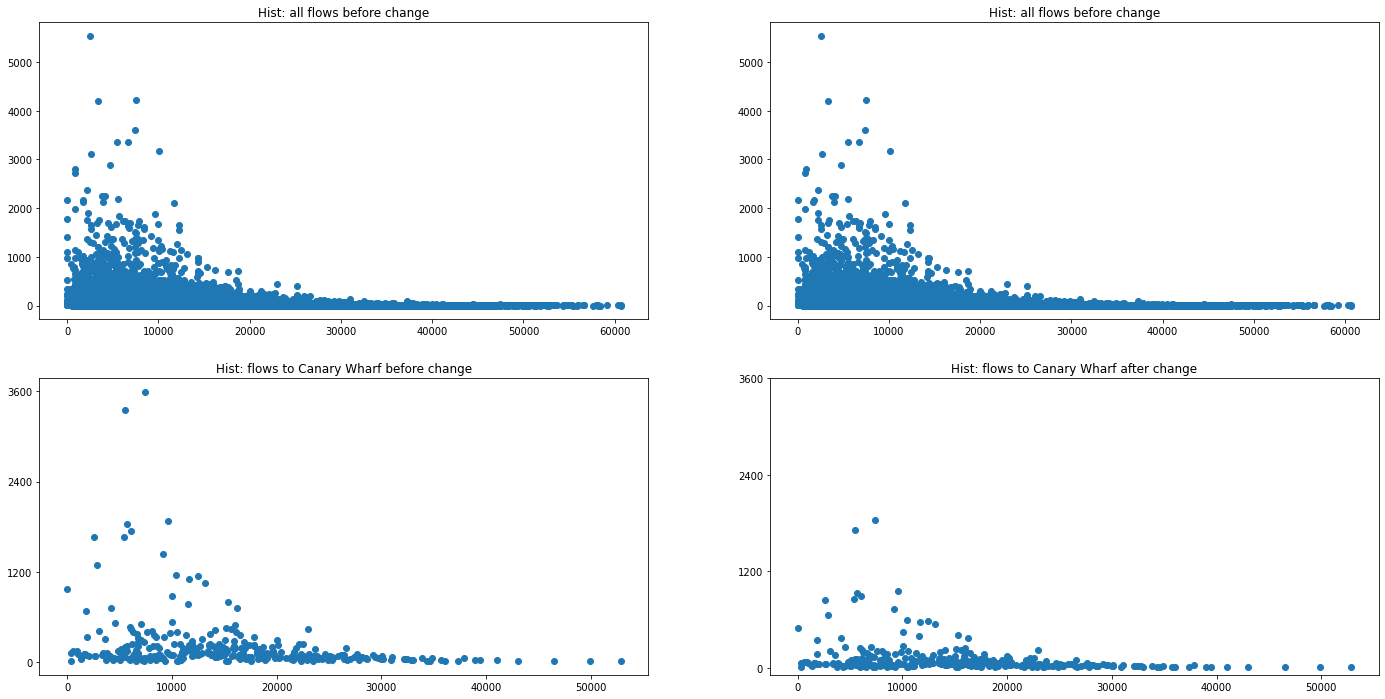

In [244]:
fig, ax = plt.subplots(2,2, figsize = (24,12))
pred_list =[]
pred_list.append(cdatasub["before_pred"].tolist())
pred_list.append(cdatasub["after_pred"].tolist())
ax[0,0].scatter(cdatasub["distance"], pred_list[0])
ax[0,0].set_title("Hist: all flows before change")
ax[0,1].scatter(cdatasub["distance"], pred_list[0])
ax[0,1].set_title("Hist: all flows before change")
cdatasub_a = cdatasub[cdatasub["station_destination"] == "Canary Wharf"]
flow_pred_before = cdatasub_a["before_pred"].tolist()
flow_pred_after =  cdatasub_a["after_pred"].tolist()
ax[1,0].scatter(cdatasub_a["distance"], flow_pred_before)
ax[1,0].set_title("Hist: flows to Canary Wharf before change")
ax[1,0].set_yticks(np.linspace(0,3600, 4))
ax[1,1].scatter(cdatasub_a["distance"], flow_pred_after)
ax[1,1].set_title("Hist: flows to Canary Wharf after change")
ax[1,1].set_yticks(np.linspace(0,3600, 4))
plt.show()

#### IV.2. Scenario B: assume that there is a significant increase in the cost of transport. Select 2 values for the parameter in the cost function reflecting scenario B. Recompute the distribution of flows.

we choose the best beta 2.9e-5 as the baseline, and the cost of transport is $exp(-2.9e-5 * d_{ij})$. Then, we increase the beta to 1 as the second scenario. The cost of transport is $ exp(- 1 * d_{ij})$, bigger than before.


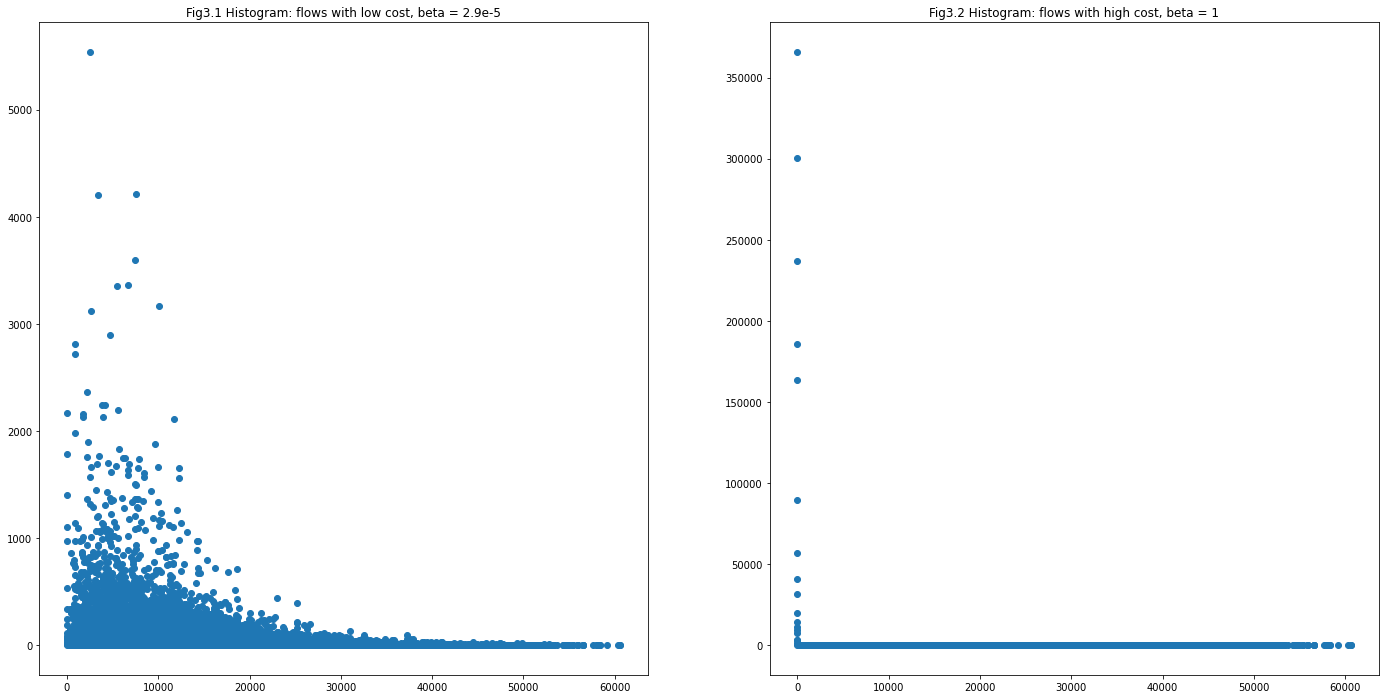

In [245]:
beta_list = [2.9e-5, 1]
flow_pred = []
for i in beta_list:
    #read data
    cdatasub = pd.read_csv("london_flows.csv")

    # calculate T = sum_ij (T_ij)
    T_all = np.sum(cdatasub["flows"])
    
    # transform dist = exp(-beta  d_ij)
    dist =np.exp(-i * cdatasub["distance"])
    
    # calculate unnormlized  flow
    Tp_unnorm = cdatasub["population"] * cdatasub["jobs"] * dist
    
    # normlize travel flow  Tp_ij
    T_prob = Tp_unnorm / np.sum(Tp_unnorm)
    
    # Tp_ij * T
    flow_pred.append(T_prob * T_all)
bins = np.linspace(-5,8, 30)
fig, ax = plt.subplots(1,2, figsize = (24,12))
ax[0].scatter(cdatasub["distance"] ,flow_pred[0])
ax[0].set_title("Fig3.1 Histogram: flows with low cost, beta = 2.9e-5")
ax[1].scatter(cdatasub["distance"] ,flow_pred[1])
ax[1].set_title("Fig3.2 Histogram: flows with high cost, beta = 1")
plt.show()

#### IV.3. Using plots, comment on the change in flows obtained for the 3 different situations: scenario A, and scenario B with two selections of parameters. Which scenario would have more impact in the redistribution of flows? Explain and justify your answers using the results of the analysis.

**Scenario 1** The significant reduction in jobs in CW leads to an overall decrease in flow to CW. The flow of other sites has little effect.

**Scenari 2**Increased travel costs will increase short-distance flows and fewer long-distance flows, (Fig 3.1 to Fig 3.2)



The change of information in a site in scenario 1 has a weak impact on the overall model, while the cost of travel in scenario 2 is a global parameter, and its change will cause qualitative changes in the model and have a greater impact.